In [66]:
import matplotlib.pyplot as plt

In [67]:
from scipy.signal import spectrogram, welch

In [68]:
import numpy as np

In [69]:
import pickle, glob

In [70]:
import sys,os

In [71]:
from scipy.fftpack import fft

In [72]:
os.getcwd()

'C:\\Users\\HP\\Desktop\\buffer_bci-master\\tutorial\\BCI-project-master'

In [73]:
#C:\Users\HP\Desktop\buffer_bci-master\tutorial\BCI-project-master
Path_FieldTrip = "../../dataAcq/buffer/python"
sys.path.append( Path_FieldTrip)

import FieldTrip

In [74]:
Path_Preproc = "../../python/signalproc"
sys.path.append(Path_Preproc)


import preproc

In [75]:
ch = '''  1) Matched : FP1	 ->	 FP1
  2) Matched : FPz	 ->	 FPz
  3) Matched : FP2	 ->	 FP2
  4) Matched : AF7	 ->	 AF7
  5) Matched : AFz	 ->	 AFz
  6) Matched : AF8	 ->	 AF8
  7) Matched : F3	 ->	 F3
  8) Matched : Fz	 ->	 Fz
  9) Matched : F4	 ->	 F4
 10) Matched : FC5	 ->	 FC5
 11) Matched : FC1	 ->	 FC1
 12) Matched : FC2	 ->	 FC2
 13) Matched : FC6	 ->	 FC6
 14) Matched : T9	 ->	 T9
 15) Matched : C3	 ->	 C3
 16) Matched : Cz	 ->	 Cz
 17) Matched : C4	 ->	 C4
 18) Matched : T10	 ->	 T10
 19) Matched : CP1	 ->	 CP1
 20) Matched : CP2	 ->	 CP2
 21) Matched : P3	 ->	 P3
 22) Matched : Pz	 ->	 Pz
 23) Matched : P4	 ->	 P4
 24) Matched : TP9	 ->	 TP9
 25) Matched : P7	 ->	 P7
 26) Matched : POz	 ->	 POz
 27) Matched : O1	 ->	 O1
 28) Matched : Oz	 ->	 Oz
 29) Matched : O2	 ->	 O2
 30) Matched : TP10	 ->	 TP10'''

In [76]:
ch_32 = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32[str(i.split(')')[0].replace(' ',''))] = str(i.split('->')[-1].replace('	 ',''))
ch_32['1']

'FP1'

In [77]:
ch_32_r = {}
for i in ch.split('\n'):
    #print(i.split(')')[0].replace(' ',''))
    #print(i.split('->')[-1].replace('	 ',''))
    ch_32_r[str(i.split('->')[-1].replace('	 ',''))] = str(i.split(')')[0].replace(' ',''))

Processin the data form the file 4 up to 15

In [78]:
 # 0 - left, 1 -right, 2 - both

values_hands = {'0':'left', '1':'right', '2':'both', '3':'none' }

In [79]:
exp = []
exp_name = []
for i in range(16,22):
    file = './data/training_data_imagined_movement_'
    print(i, file+str(i)+'.pk')
    f = open(file+str(i)+'.pk', 'rb')
    exp_name.append(file+str(i))
    exp.append(pickle.load(f))

16 ./data/training_data_imagined_movement_16.pk
17 ./data/training_data_imagined_movement_17.pk
18 ./data/training_data_imagined_movement_18.pk
19 ./data/training_data_imagined_movement_19.pk
20 ./data/training_data_imagined_movement_20.pk
21 ./data/training_data_imagined_movement_21.pk


In [80]:
len(exp)

6

In [81]:
exp[2]['data'][0].shape

(750, 37)

In [82]:
left_hand_mov = []
right_hand_mov = []
both_hands_mov = []
no_hands_mov = []



#Counters

right = 0
left = 0
both = 0
none = 0


for n_exp in range(len(exp)):
    print(' ***********   Experiment  '+exp_name[n_exp]+'   *********** ')
    data           =   np.array(exp[n_exp]['data'])   #data support variable
    data           =   np.transpose(data)
    #print(data.shape)
    data           =   preproc.detrend(data)
    data           =   preproc.spatialfilter(data, type = 'spatialfilter')
    data, freqs    =   preproc.powerspectrum(data,dim = 1,fSample=exp[n_exp]['hdr'].fSample)
    
    
    #data,freqIdx  =   preproc.selectbands(data,dim=1,band=freqbands,bins=freqs)  #Check out later
    
    #print(len(freqs))
    
    print(data.shape)
    
    n_events = data.shape[2]
    for event in range(n_events):
        
        print(exp[n_exp]['events'][event].value[0])
        
        if exp[n_exp]['events'][event].value[0] == 0:
            print('left')
            left = left + 1
            left_hand_mov.append(data[:,:,event])
        
        
        if exp[n_exp]['events'][event].value[0] == 1:
            print('right')
            right = right +1
            right_hand_mov.append(data[:,:,event])
        
            
        if exp[n_exp]['events'][event].value[0] == 2:
            print('both')
            both = both + 1
            both_hands_mov.append(data[:,:,event])
            
        if exp[n_exp]['events'][event].value[0] == 3:
            print('none')
            none = none + 1
            no_hands_mov.append(data[:,:,event])           
        
    print('left',left)
    print('right',right)
    print('both',both)
    print('none',none)
    print('-'*80)
        
left_hand_mov    =   np.array(left_hand_mov)
right_hand_mov   =   np.array(right_hand_mov)
both_hands_mov   =   np.array(both_hands_mov)
no_hands_mov     =   np.array(no_hands_mov)

 ***********   Experiment  ./data/training_data_imagined_movement_16   *********** 
(37, 375, 24)
3
none
2
both
2
both
1
right
3
none
3
none
2
both
1
right
2
both
1
right
0
left
1
right
0
left
2
both
1
right
0
left
2
both
3
none
3
none
1
right
0
left
3
none
0
left
0
left
left 6
right 6
both 6
none 6
--------------------------------------------------------------------------------
 ***********   Experiment  ./data/training_data_imagined_movement_17   *********** 
(37, 375, 24)
1
right
0
left
0
left
3
none
2
both
0
left
2
both
1
right
2
both
0
left
3
none
2
both
1
right
3
none
2
both
3
none
1
right
1
right
0
left
2
both
0
left
3
none
1
right
3
none
left 12
right 12
both 12
none 12
--------------------------------------------------------------------------------
 ***********   Experiment  ./data/training_data_imagined_movement_18   *********** 
(37, 375, 24)
1
right
3
none
3
none
0
left
2
both
1
right
1
right
0
left
2
both
2
both
3
none
0
left
2
both
1
right
0
left
1
right
2
both
0
left
3
n

In [83]:
print('left',left_hand_mov.shape)
print('right',right_hand_mov.shape)
print('both',both_hands_mov.shape)
print('none',no_hands_mov.shape)

left (36, 37, 375)
right (36, 37, 375)
both (36, 37, 375)
none (36, 37, 375)


In [84]:
frq_20 = freqs[np.where(freqs < 20)]
len(frq_20)

60

In [85]:
# outliers removal for left hand

goodtr, badtr = preproc.outlierdetection(left_hand_mov,dim=0)
print(len(goodtr))
left_goodtr = left_hand_mov[goodtr,:,:]

33


In [86]:
# outliers removal for right hand

goodtr, badtr = preproc.outlierdetection(right_hand_mov,dim=0)
print(len(goodtr))
right_goodtr = right_hand_mov[goodtr,:,:]

35


In [87]:
# computing grand averages
left_good_avg = np.mean(left_goodtr, axis=0)
right_good_avg = np.mean(right_goodtr, axis=0)

In [88]:
print(left_good_avg.shape)
print(right_good_avg.shape)

(37, 375)
(37, 375)


In [89]:
#select frequency from 8 Hz to 30 Hz

left_8_30,freqIdx  =   preproc.selectbands(left_good_avg,dim=1,band=[8,30],bins=freqs)
right_8_30,freqIdx  =   preproc.selectbands(right_good_avg,dim=1,band=[8,30],bins=freqs)

In [90]:
frq_8_30 =  freqs[freqIdx]

0


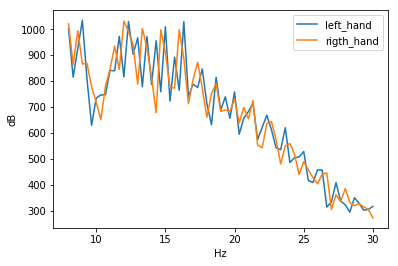

1


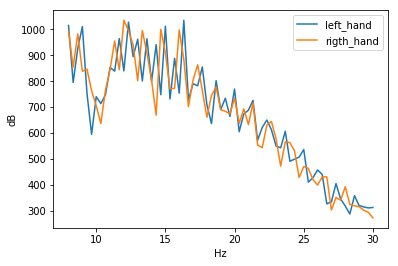

2


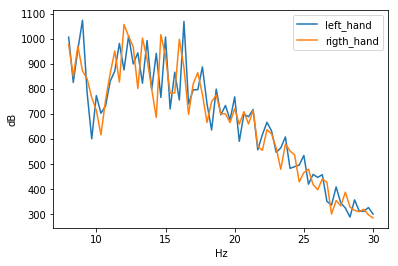

3


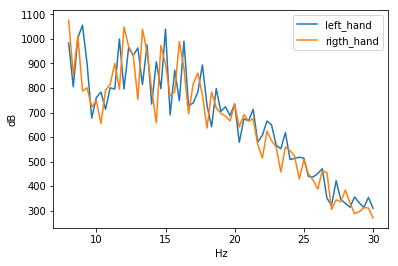

4


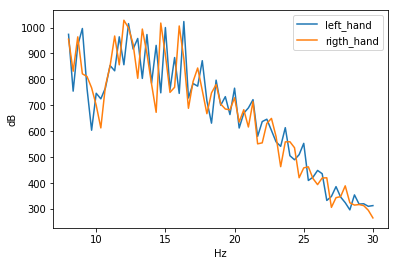

5


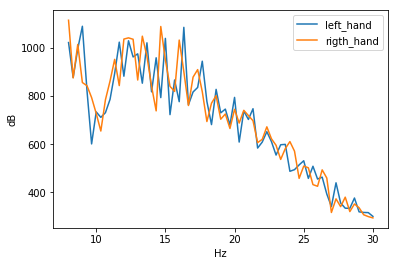

6


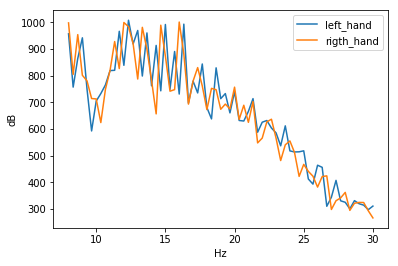

7


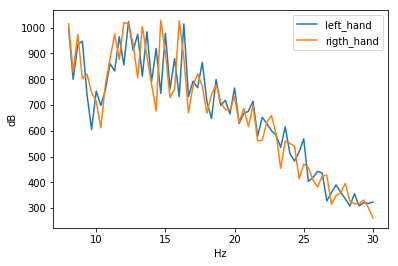

8


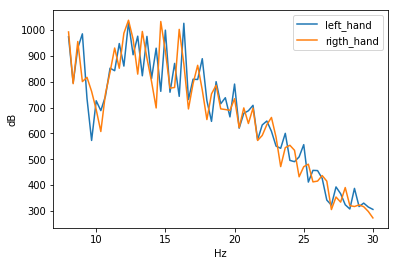

9


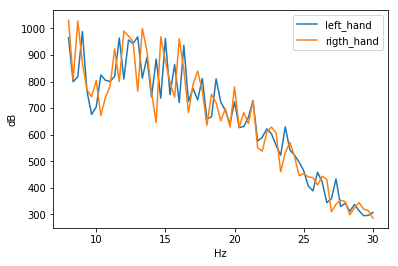

10


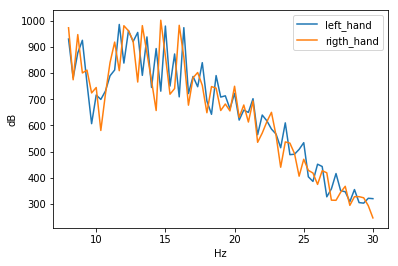

11


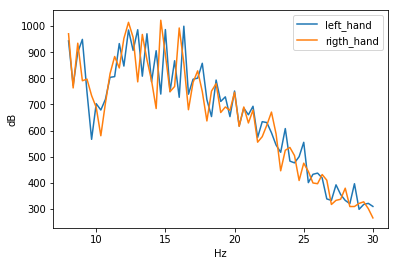

12


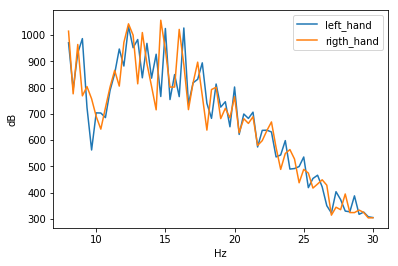

13


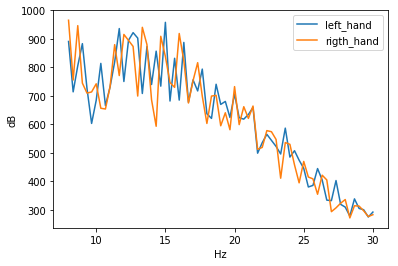

14


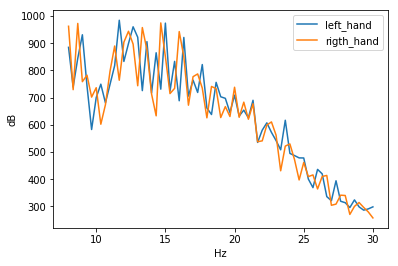

15


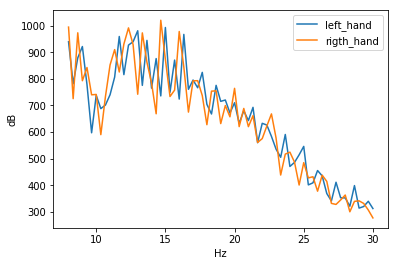

16


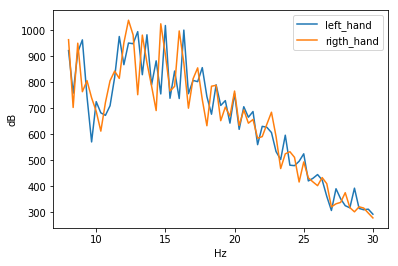

17


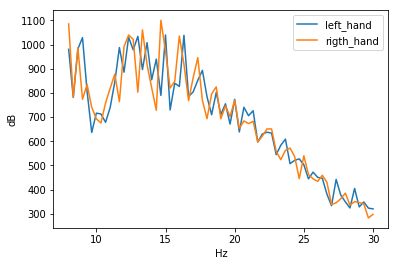

18


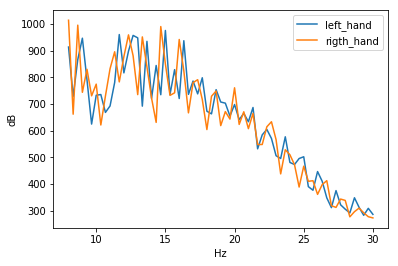

19


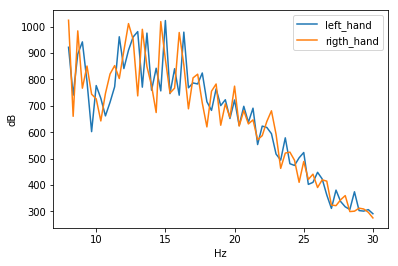

20


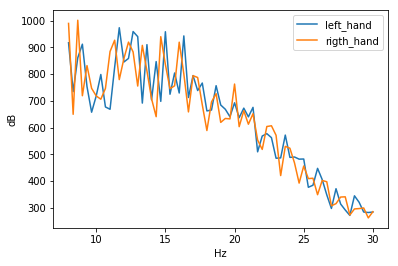

21


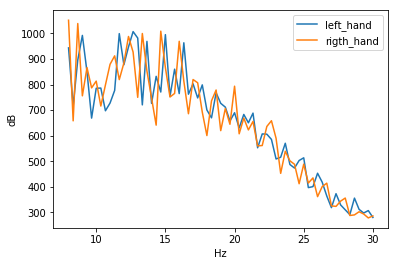

22


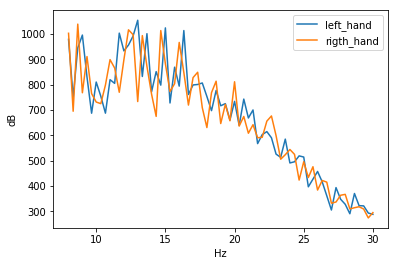

23


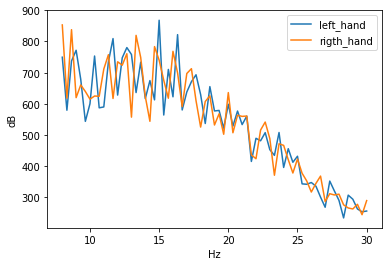

24


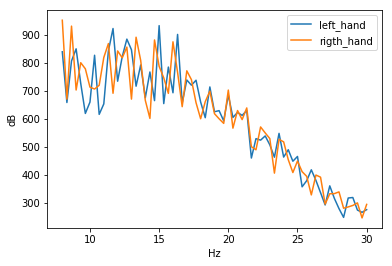

25


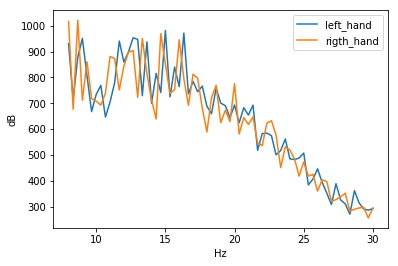

26


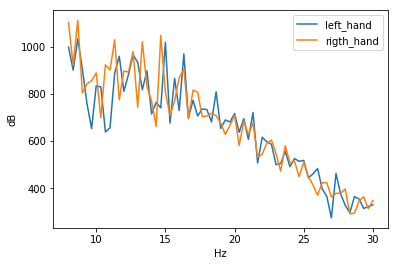

27


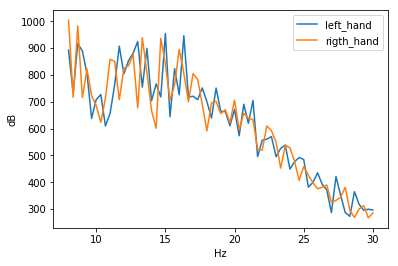

28


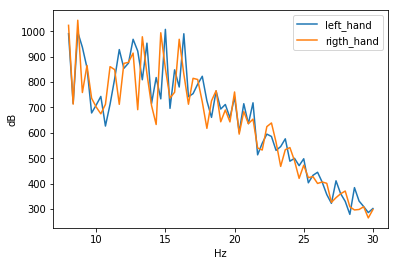

29


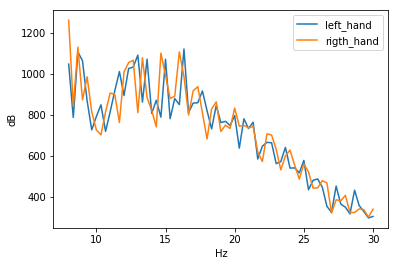

30


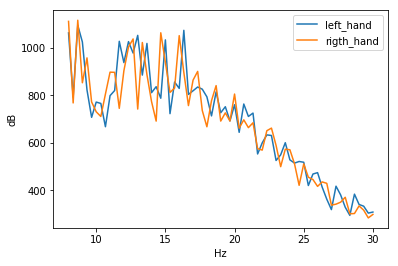

31


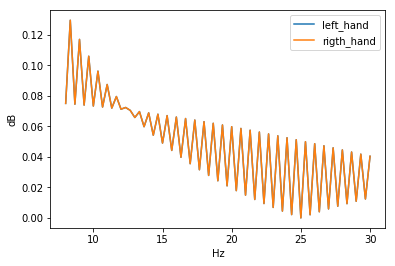

32


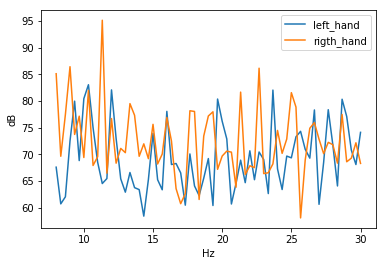

33


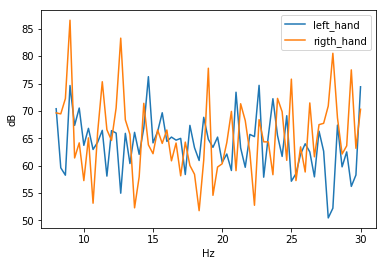

34


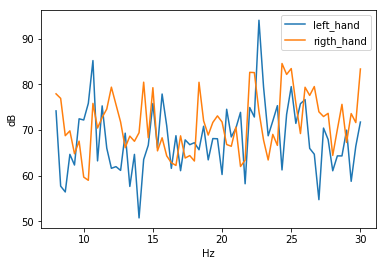

35


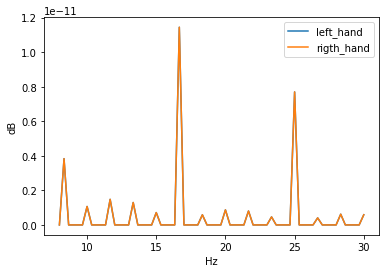

36


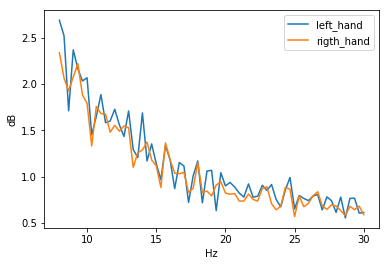

In [91]:
# left (blue) vs right (orange) plots 

for ch in range(left_good_avg.shape[0]):
    print(ch)
    plt.plot(frq_8_30,left_8_30[ch,:], label='left_hand')
    plt.plot(frq_8_30,right_8_30[ch,:], label='rigth_hand')
    plt.xlabel('Hz')
    plt.ylabel('dB')
    plt.legend()
    plt.show()

In [92]:
# outliers removal for both hand

goodtr, badtr = preproc.outlierdetection(both_hands_mov,dim=0)
print(len(goodtr))
both_goodtr = both_hands_mov[goodtr,:,:]

36


In [93]:
# outliers removal for no hand

goodtr, badtr = preproc.outlierdetection(no_hands_mov,dim=0)
print(len(goodtr))
none_goodtr = no_hands_mov[goodtr,:,:]

32


In [94]:
# computing grand averages
both_good_avg = np.mean(both_goodtr, axis=0)
none_good_avg = np.mean(none_goodtr, axis=0)

In [95]:
print(both_good_avg.shape)
print(none_good_avg.shape)

(37, 375)
(37, 375)


In [96]:
#select frequency from 8 Hz to 12 Hz

both_8_30,freqIdx  =   preproc.selectbands(both_good_avg,dim=1,band=[8,30],bins=freqs)
none_8_30,freqIdx  =   preproc.selectbands(none_good_avg,dim=1,band=[8,30],bins=freqs)

0


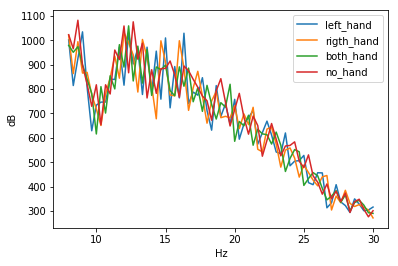

1


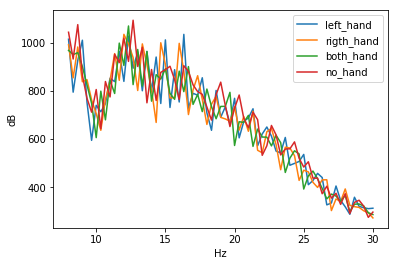

2


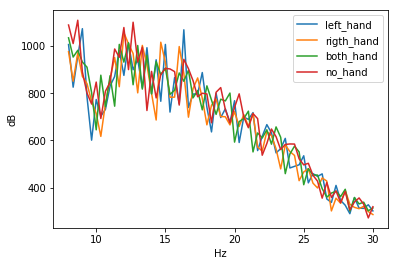

3


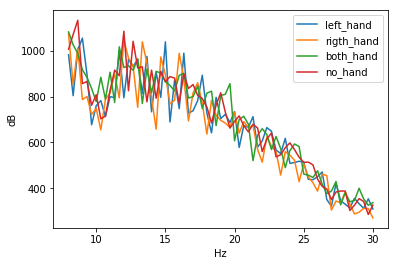

4


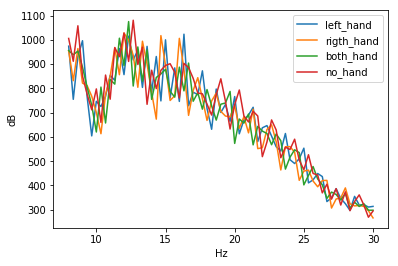

5


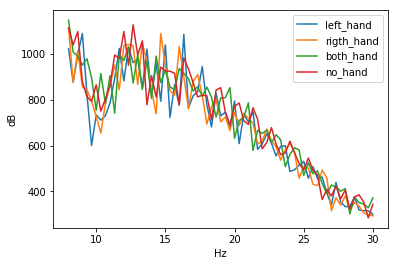

6


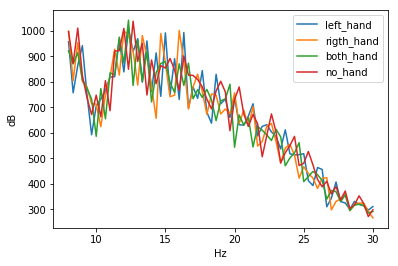

7


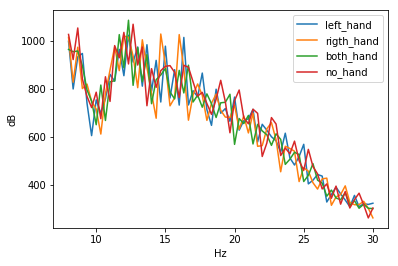

8


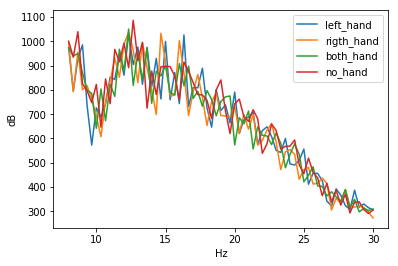

9


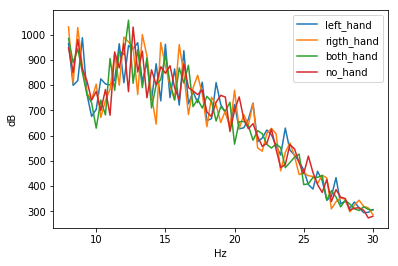

10


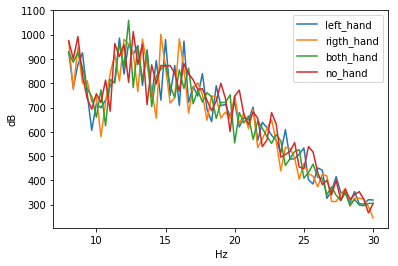

11


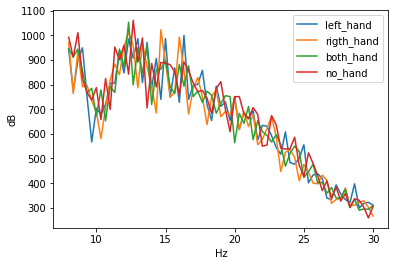

12


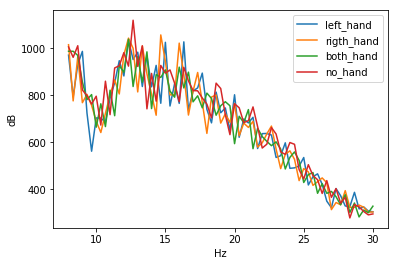

13


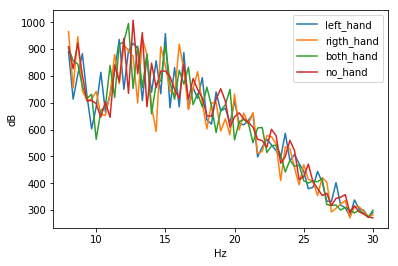

14


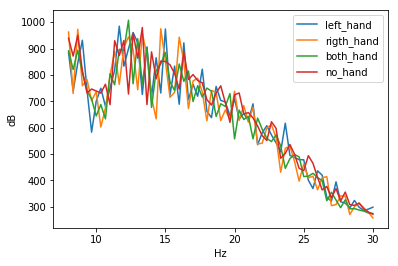

15


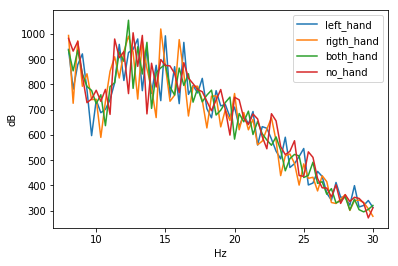

16


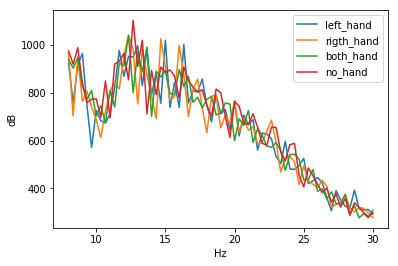

17


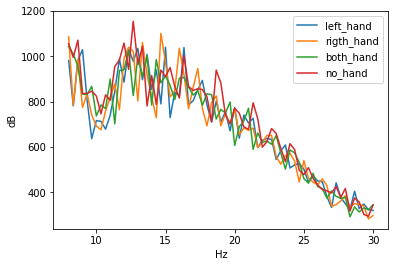

18


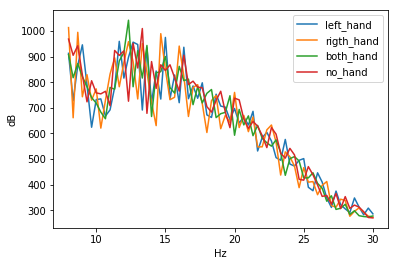

19


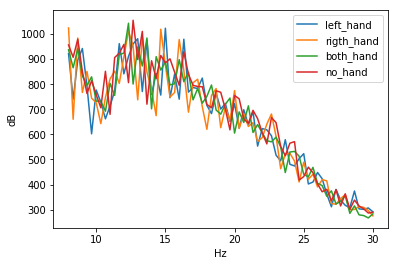

20


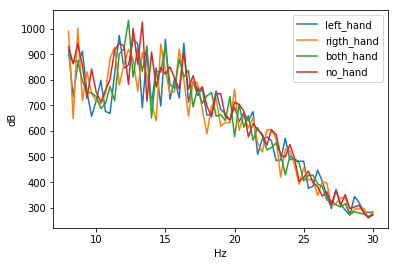

21


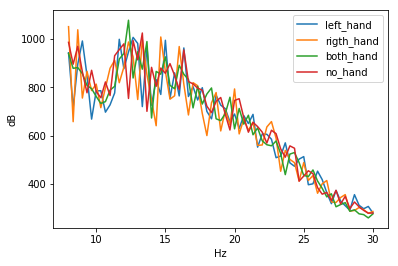

22


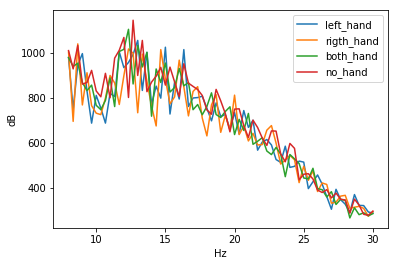

23


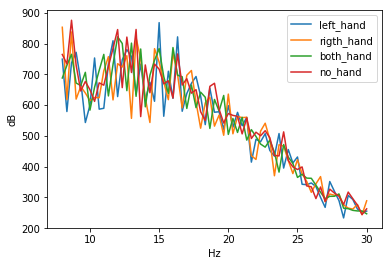

24


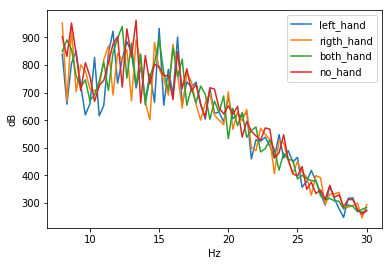

25


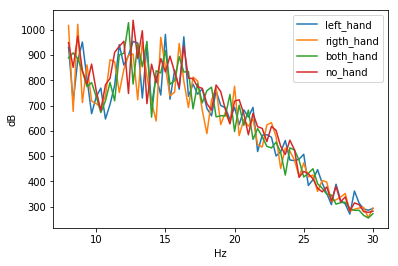

26


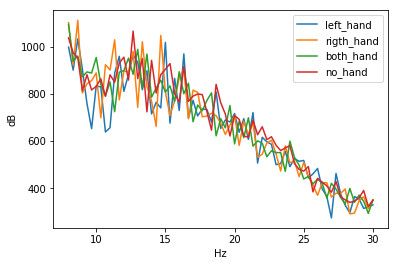

27


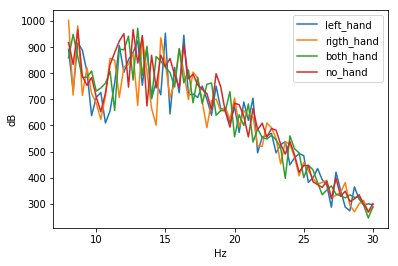

28


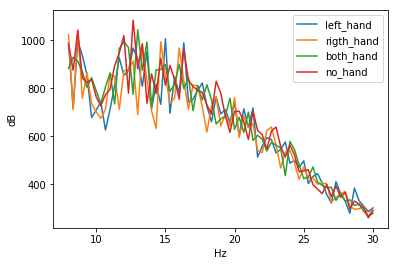

29


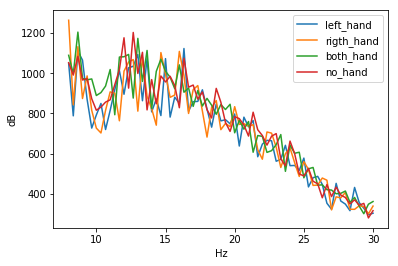

30


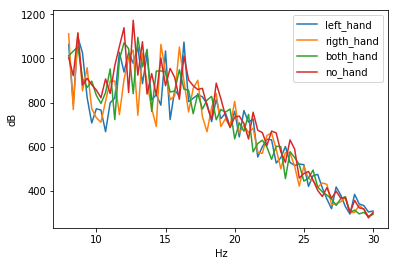

31


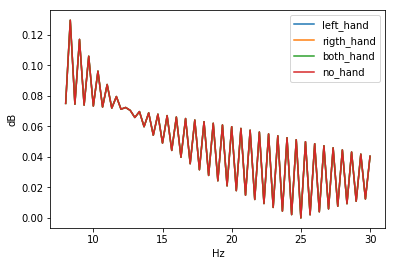

32


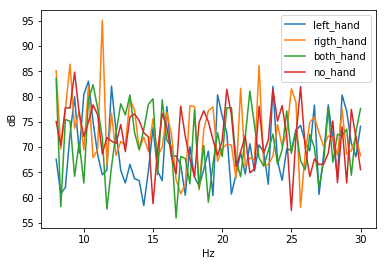

33


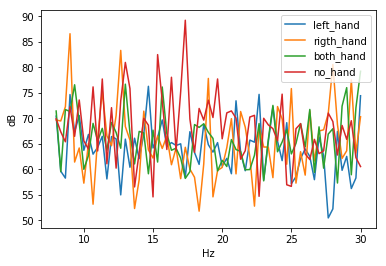

34


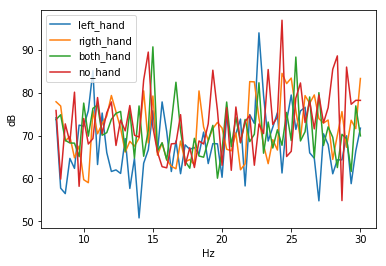

35


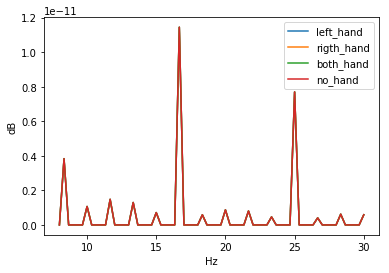

36


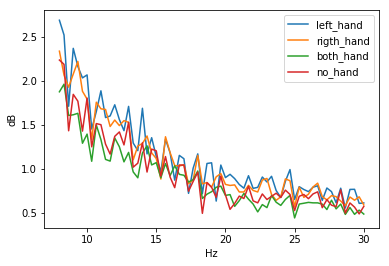

In [97]:
# left (blue) vs right (orange) vs both vs none plots 

for ch in range(left_good_avg.shape[0]):
    print(ch)
    plt.plot(frq_8_30,left_8_30[ch,:], label='left_hand')
    plt.plot(frq_8_30,right_8_30[ch,:], label='rigth_hand')
    plt.plot(frq_8_30,both_8_30[ch,:], label='both_hand')
    plt.plot(frq_8_30,none_8_30[ch,:], label='no_hand')
    plt.xlabel('Hz')
    plt.ylabel('dB')
    plt.legend()
    plt.show()

# PCA

In [98]:
# big matrix containing left and right data

lr_Data = np.concatenate((left_goodtr[:,:,freqIdx],right_goodtr[:,:,freqIdx]), axis=0)
print(lr_Data.shape)

(68, 37, 67)


In [99]:
# Select channel

c = 14

data = lr_Data[:,c,:]

print(data.shape)

(68, 67)


In [100]:
# constuct labels
y_l = np.zeros((left_goodtr.shape[0],1),dtype=int)
y_r = np.ones((right_goodtr.shape[0],1),dtype=int)

y = np.concatenate((y_l,y_r), axis = 0).flatten()
print(y.shape)

(68,)


In [101]:
mu=np.mean(data,axis=0)

In [102]:
mu=np.mean(data,axis=0)

Y=data-np.ones((len(data),1))*mu

u, s, vh = np.linalg.svd(Y, full_matrices=True)

V=vh.T

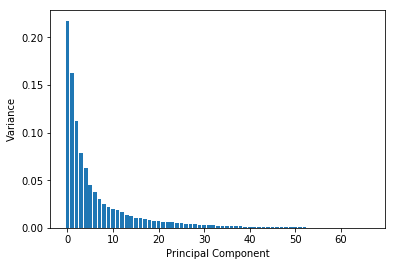

Figure 9: A barplot showing the fraction of variance (Y-axis) accounted for each principal components (X-axis)


In [103]:
x = np.arange(0,67,1)

sum_S = np.sum(s*s)

ro_V = ((s*s)/sum_S)

plt.ylabel('Variance')
plt.xlabel('Principal Component')
plt.bar(x,ro_V)
plt.show()
print('Figure 9: A barplot showing the fraction of variance (Y-axis) accounted for each principal components (X-axis)')

In [104]:
# Variance explained by firt n principal components

n = 3

print(np.sum(ro_V[0:n]*100),'%')

49.21824572508535 %


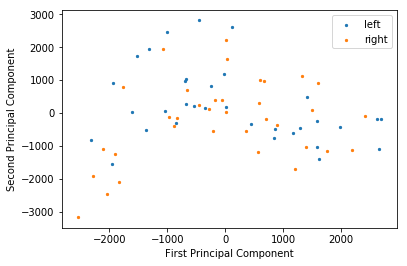

Figure 8: A scatterplot of the data projected onto the first PC (on the X-axis) and the second PC (on the Y-axis)


In [105]:
# Plot of first 2 principal components
Z=np.dot(Y,V[:,0:2])
l_index = y < 1
r_index = y > 0


plt.scatter(Z[l_index,0],Z[l_index,1],5, label = 'left')
plt.scatter(Z[r_index,0],Z[r_index,1],5, label = 'right')
plt.ylabel('Second Principal Component')
plt.xlabel('First Principal Component')
plt.legend()
plt.show()
print('Figure 8: A scatterplot of the data projected onto the first PC (on the X-axis) and the second PC (on the Y-axis)')

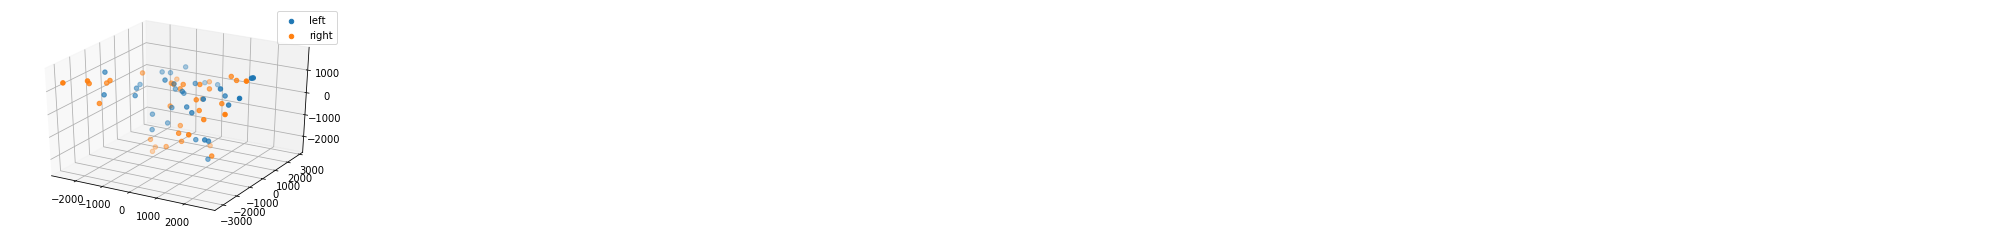

In [106]:
# Plot of first 2 principal components
from mpl_toolkits.mplot3d import Axes3D

Z=np.dot(Y,V[:,0:3])
l_index = y < 1
r_index = y > 0

fig = plt.figure()
ax = plt.axes(projection='3d')

ax.scatter(Z[l_index,0],Z[l_index,1], Z[l_index,2], label = 'left')
ax.scatter(Z[r_index,0],Z[r_index,1], Z[r_index,2], label = 'right')
plt.legend()
plt.show()


## Classification

In [107]:
from sklearn.svm import SVC
from sklearn.model_selection import LeaveOneOut
from sklearn import preprocessing

In [108]:
clf = SVC(kernel='sigmoid', gamma='auto')


In [109]:
accuracies = []

for ch in range(31):
    
    print(ch)
    
    data = lr_Data[:,ch,:]
    
    #print(data.shape)
    
    data_scaled = preprocessing.scale(data, axis=0)
    
    #print(data_scaled.mean(axis=0))
    #print(data_scaled.std(axis=0))
    
    loo = LeaveOneOut()
    loo.get_n_splits(data)
    
    i = 0
    get = 0
    miss = 0
    
    for train_index, test_index in loo.split(data):
        clf.fit(data[train_index],y[train_index])
        print('fold',i)
        pred = clf.predict(data[test_index])
        if pred == y[test_index]:
            get += 1
            #print('get')
        else:
            miss += 1
            #print('miss')
            
        i += 1
        print('get/missed', get, '/', miss)
        print('---'*30)
    acc = get/(get+miss)
        
    #print(acc)
    accuracies.append(acc)
        
        
    print('###'*40)

0
fold 0
get/missed 0 / 1
------------------------------------------------------------------------------------------
fold 1
get/missed 0 / 2
------------------------------------------------------------------------------------------
fold 2
get/missed 0 / 3
------------------------------------------------------------------------------------------
fold 3
get/missed 0 / 4
------------------------------------------------------------------------------------------
fold 4
get/missed 0 / 5
------------------------------------------------------------------------------------------
fold 5
get/missed 0 / 6
------------------------------------------------------------------------------------------
fold 6
get/missed 0 / 7
------------------------------------------------------------------------------------------
fold 7
get/missed 0 / 8
------------------------------------------------------------------------------------------
fold 8
get/missed 0 / 9
------------------------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 36
get/missed 4 / 33
------------------------------------------------------------------------------------------
fold 37
get/missed 5 / 33
------------------------------------------------------------------------------------------
fold 38
get/missed 6 / 33
------------------------------------------------------------------------------------------
fold 39
get/missed 7 / 33
------------------------------------------------------------------------------------------
fold 40
get/missed 8 / 33
------------------------------------------------------------------------------------------
fold 41
get/missed 9 / 33
------------------------------------------------------------------------------------------
fold 42
get/missed 10 / 33
------------------------------------------------------------------------------------------
fold 43
get/missed 11 / 33
------------------------------------------------------------------------------------------
fold 44
get/missed 12 / 33
-----------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 46
get/missed 14 / 33
------------------------------------------------------------------------------------------
fold 47
get/missed 15 / 33
------------------------------------------------------------------------------------------
fold 48
get/missed 16 / 33
------------------------------------------------------------------------------------------
fold 49
get/missed 17 / 33
------------------------------------------------------------------------------------------
fold 50
get/missed 18 / 33
------------------------------------------------------------------------------------------
fold 51
get/missed 19 / 33
------------------------------------------------------------------------------------------
fold 52
get/missed 20 / 33
------------------------------------------------------------------------------------------
fold 53
get/missed 21 / 33
------------------------------------------------------------------------------------------
fold 54
get/missed 22 / 33
-----------------------------

fold 49
get/missed 17 / 33
------------------------------------------------------------------------------------------
fold 50
get/missed 18 / 33
------------------------------------------------------------------------------------------
fold 51
get/missed 19 / 33
------------------------------------------------------------------------------------------
fold 52
get/missed 20 / 33
------------------------------------------------------------------------------------------
fold 53
get/missed 21 / 33
------------------------------------------------------------------------------------------
fold 54
get/missed 22 / 33
------------------------------------------------------------------------------------------
fold 55
get/missed 23 / 33
------------------------------------------------------------------------------------------
fold 56
get/missed 24 / 33
------------------------------------------------------------------------------------------
fold 57
get/missed 25 / 33
-----------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

get/missed 33 / 33
------------------------------------------------------------------------------------------
fold 66
get/missed 34 / 33
------------------------------------------------------------------------------------------
fold 67
get/missed 35 / 33
------------------------------------------------------------------------------------------
########################################################################################################################
5
fold 0
get/missed 0 / 1
------------------------------------------------------------------------------------------
fold 1
get/missed 0 / 2
------------------------------------------------------------------------------------------
fold 2
get/missed 0 / 3
------------------------------------------------------------------------------------------
fold 3
get/missed 0 / 4
------------------------------------------------------------------------------------------
fold 4
get/missed 0 / 5
-----------------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 10
get/missed 0 / 11
------------------------------------------------------------------------------------------
fold 11
get/missed 0 / 12
------------------------------------------------------------------------------------------
fold 12
get/missed 0 / 13
------------------------------------------------------------------------------------------
fold 13
get/missed 0 / 14
------------------------------------------------------------------------------------------
fold 14
get/missed 0 / 15
------------------------------------------------------------------------------------------
fold 15
get/missed 0 / 16
------------------------------------------------------------------------------------------
fold 16
get/missed 0 / 17
------------------------------------------------------------------------------------------
fold 17
get/missed 0 / 18
------------------------------------------------------------------------------------------
fold 18
get/missed 0 / 19
--------------------------------------

fold 22
get/missed 0 / 23
------------------------------------------------------------------------------------------
fold 23
get/missed 0 / 24
------------------------------------------------------------------------------------------
fold 24
get/missed 0 / 25
------------------------------------------------------------------------------------------
fold 25
get/missed 0 / 26
------------------------------------------------------------------------------------------
fold 26
get/missed 0 / 27
------------------------------------------------------------------------------------------
fold 27
get/missed 0 / 28
------------------------------------------------------------------------------------------
fold 28
get/missed 0 / 29
------------------------------------------------------------------------------------------
fold 29
get/missed 0 / 30
------------------------------------------------------------------------------------------
fold 30
get/missed 0 / 31
--------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 31
get/missed 0 / 32
------------------------------------------------------------------------------------------
fold 32
get/missed 0 / 33
------------------------------------------------------------------------------------------
fold 33
get/missed 1 / 33
------------------------------------------------------------------------------------------
fold 34
get/missed 2 / 33
------------------------------------------------------------------------------------------
fold 35
get/missed 3 / 33
------------------------------------------------------------------------------------------
fold 36
get/missed 4 / 33
------------------------------------------------------------------------------------------
fold 37
get/missed 5 / 33
------------------------------------------------------------------------------------------
fold 38
get/missed 6 / 33
------------------------------------------------------------------------------------------
fold 39
get/missed 7 / 33
--------------------------------------

fold 44
get/missed 12 / 33
------------------------------------------------------------------------------------------
fold 45
get/missed 13 / 33
------------------------------------------------------------------------------------------
fold 46
get/missed 14 / 33
------------------------------------------------------------------------------------------
fold 47
get/missed 15 / 33
------------------------------------------------------------------------------------------
fold 48
get/missed 16 / 33
------------------------------------------------------------------------------------------
fold 49
get/missed 17 / 33
------------------------------------------------------------------------------------------
fold 50
get/missed 18 / 33
------------------------------------------------------------------------------------------
fold 51
get/missed 19 / 33
------------------------------------------------------------------------------------------
fold 52
get/missed 20 / 33
-----------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 61
get/missed 29 / 33
------------------------------------------------------------------------------------------
fold 62
get/missed 30 / 33
------------------------------------------------------------------------------------------
fold 63
get/missed 31 / 33
------------------------------------------------------------------------------------------
fold 64
get/missed 32 / 33
------------------------------------------------------------------------------------------
fold 65
get/missed 33 / 33
------------------------------------------------------------------------------------------
fold 66
get/missed 34 / 33
------------------------------------------------------------------------------------------
fold 67
get/missed 35 / 33
------------------------------------------------------------------------------------------
########################################################################################################################
11
fold 0
get/missed 0 / 1
--------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 1
get/missed 0 / 2
------------------------------------------------------------------------------------------
fold 2
get/missed 0 / 3
------------------------------------------------------------------------------------------
fold 3
get/missed 0 / 4
------------------------------------------------------------------------------------------
fold 4
get/missed 0 / 5
------------------------------------------------------------------------------------------
fold 5
get/missed 0 / 6
------------------------------------------------------------------------------------------
fold 6
get/missed 0 / 7
------------------------------------------------------------------------------------------
fold 7
get/missed 0 / 8
------------------------------------------------------------------------------------------
fold 8
get/missed 0 / 9
------------------------------------------------------------------------------------------
fold 9
get/missed 0 / 10
-------------------------------------------------------

fold 21
get/missed 0 / 22
------------------------------------------------------------------------------------------
fold 22
get/missed 0 / 23
------------------------------------------------------------------------------------------
fold 23
get/missed 0 / 24
------------------------------------------------------------------------------------------
fold 24
get/missed 0 / 25
------------------------------------------------------------------------------------------
fold 25
get/missed 0 / 26
------------------------------------------------------------------------------------------
fold 26
get/missed 0 / 27
------------------------------------------------------------------------------------------
fold 27
get/missed 0 / 28
------------------------------------------------------------------------------------------
fold 28
get/missed 0 / 29
------------------------------------------------------------------------------------------
fold 29
get/missed 0 / 30
--------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 33
get/missed 1 / 33
------------------------------------------------------------------------------------------
fold 34
get/missed 2 / 33
------------------------------------------------------------------------------------------
fold 35
get/missed 3 / 33
------------------------------------------------------------------------------------------
fold 36
get/missed 4 / 33
------------------------------------------------------------------------------------------
fold 37
get/missed 5 / 33
------------------------------------------------------------------------------------------
fold 38
get/missed 6 / 33
------------------------------------------------------------------------------------------
fold 39
get/missed 7 / 33
------------------------------------------------------------------------------------------
fold 40
get/missed 8 / 33
------------------------------------------------------------------------------------------
fold 41
get/missed 9 / 33
--------------------------------------

fold 42
get/missed 10 / 33
------------------------------------------------------------------------------------------
fold 43
get/missed 11 / 33
------------------------------------------------------------------------------------------
fold 44
get/missed 12 / 33
------------------------------------------------------------------------------------------
fold 45
get/missed 13 / 33
------------------------------------------------------------------------------------------
fold 46
get/missed 14 / 33
------------------------------------------------------------------------------------------
fold 47
get/missed 15 / 33
------------------------------------------------------------------------------------------
fold 48
get/missed 16 / 33
------------------------------------------------------------------------------------------
fold 49
get/missed 17 / 33
------------------------------------------------------------------------------------------
fold 50
get/missed 18 / 33
-----------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were


get/missed 22 / 33
------------------------------------------------------------------------------------------
fold 55
get/missed 23 / 33
------------------------------------------------------------------------------------------
fold 56
get/missed 24 / 33
------------------------------------------------------------------------------------------
fold 57
get/missed 25 / 33
------------------------------------------------------------------------------------------
fold 58
get/missed 26 / 33
------------------------------------------------------------------------------------------
fold 59
get/missed 27 / 33
------------------------------------------------------------------------------------------
fold 60
get/missed 28 / 33
------------------------------------------------------------------------------------------
fold 61
get/missed 29 / 33
------------------------------------------------------------------------------------------
fold 62
get/missed 30 / 33
------------------------------------

fold 63
get/missed 31 / 33
------------------------------------------------------------------------------------------
fold 64
get/missed 32 / 33
------------------------------------------------------------------------------------------
fold 65
get/missed 33 / 33
------------------------------------------------------------------------------------------
fold 66
get/missed 34 / 33
------------------------------------------------------------------------------------------
fold 67
get/missed 35 / 33
------------------------------------------------------------------------------------------
########################################################################################################################
18
fold 0
get/missed 0 / 1
------------------------------------------------------------------------------------------
fold 1
get/missed 0 / 2
------------------------------------------------------------------------------------------
fold 2
get/missed 0 / 3
--------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 5
get/missed 0 / 6
------------------------------------------------------------------------------------------
fold 6
get/missed 0 / 7
------------------------------------------------------------------------------------------
fold 7
get/missed 0 / 8
------------------------------------------------------------------------------------------
fold 8
get/missed 0 / 9
------------------------------------------------------------------------------------------
fold 9
get/missed 0 / 10
------------------------------------------------------------------------------------------
fold 10
get/missed 0 / 11
------------------------------------------------------------------------------------------
fold 11
get/missed 0 / 12
------------------------------------------------------------------------------------------
fold 12
get/missed 0 / 13
------------------------------------------------------------------------------------------
fold 13
get/missed 0 / 14
-----------------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 24
get/missed 0 / 25
------------------------------------------------------------------------------------------
fold 25
get/missed 0 / 26
------------------------------------------------------------------------------------------
fold 26
get/missed 0 / 27
------------------------------------------------------------------------------------------
fold 27
get/missed 0 / 28
------------------------------------------------------------------------------------------
fold 28
get/missed 0 / 29
------------------------------------------------------------------------------------------
fold 29
get/missed 0 / 30
------------------------------------------------------------------------------------------
fold 30
get/missed 0 / 31
------------------------------------------------------------------------------------------
fold 31
get/missed 0 / 32
------------------------------------------------------------------------------------------
fold 32
get/missed 0 / 33
--------------------------------------

fold 38
get/missed 6 / 33
------------------------------------------------------------------------------------------
fold 39
get/missed 7 / 33
------------------------------------------------------------------------------------------
fold 40
get/missed 8 / 33
------------------------------------------------------------------------------------------
fold 41
get/missed 9 / 33
------------------------------------------------------------------------------------------
fold 42
get/missed 10 / 33
------------------------------------------------------------------------------------------
fold 43
get/missed 11 / 33
------------------------------------------------------------------------------------------
fold 44
get/missed 12 / 33
------------------------------------------------------------------------------------------
fold 45
get/missed 13 / 33
------------------------------------------------------------------------------------------
fold 46
get/missed 14 / 33
---------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 54
get/missed 22 / 33
------------------------------------------------------------------------------------------
fold 55
get/missed 23 / 33
------------------------------------------------------------------------------------------
fold 56
get/missed 24 / 33
------------------------------------------------------------------------------------------
fold 57
get/missed 25 / 33
------------------------------------------------------------------------------------------
fold 58
get/missed 26 / 33
------------------------------------------------------------------------------------------
fold 59
get/missed 27 / 33
------------------------------------------------------------------------------------------
fold 60
get/missed 28 / 33
------------------------------------------------------------------------------------------
fold 61
get/missed 29 / 33
------------------------------------------------------------------------------------------
fold 62
get/missed 30 / 33
-----------------------------

fold 67
get/missed 35 / 33
------------------------------------------------------------------------------------------
########################################################################################################################
24
fold 0
get/missed 0 / 1
------------------------------------------------------------------------------------------
fold 1
get/missed 0 / 2
------------------------------------------------------------------------------------------
fold 2
get/missed 0 / 3
------------------------------------------------------------------------------------------
fold 3
get/missed 0 / 4
------------------------------------------------------------------------------------------
fold 4
get/missed 0 / 5
------------------------------------------------------------------------------------------
fold 5
get/missed 0 / 6
------------------------------------------------------------------------------------------
fold 6
get/missed 0 / 7
--------------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 13
get/missed 0 / 14
------------------------------------------------------------------------------------------
fold 14
get/missed 0 / 15
------------------------------------------------------------------------------------------
fold 15
get/missed 0 / 16
------------------------------------------------------------------------------------------
fold 16
get/missed 0 / 17
------------------------------------------------------------------------------------------
fold 17
get/missed 0 / 18
------------------------------------------------------------------------------------------
fold 18
get/missed 0 / 19
------------------------------------------------------------------------------------------
fold 19
get/missed 0 / 20
------------------------------------------------------------------------------------------
fold 20
get/missed 0 / 21
------------------------------------------------------------------------------------------
fold 21
get/missed 0 / 22
--------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 28
get/missed 0 / 29
------------------------------------------------------------------------------------------
fold 29
get/missed 0 / 30
------------------------------------------------------------------------------------------
fold 30
get/missed 0 / 31
------------------------------------------------------------------------------------------
fold 31
get/missed 0 / 32
------------------------------------------------------------------------------------------
fold 32
get/missed 0 / 33
------------------------------------------------------------------------------------------
fold 33
get/missed 1 / 33
------------------------------------------------------------------------------------------
fold 34
get/missed 2 / 33
------------------------------------------------------------------------------------------
fold 35
get/missed 3 / 33
------------------------------------------------------------------------------------------
fold 36
get/missed 4 / 33
--------------------------------------

fold 45
get/missed 13 / 33
------------------------------------------------------------------------------------------
fold 46
get/missed 14 / 33
------------------------------------------------------------------------------------------
fold 47
get/missed 15 / 33
------------------------------------------------------------------------------------------
fold 48
get/missed 16 / 33
------------------------------------------------------------------------------------------
fold 49
get/missed 17 / 33
------------------------------------------------------------------------------------------
fold 50
get/missed 18 / 33
------------------------------------------------------------------------------------------
fold 51
get/missed 19 / 33
------------------------------------------------------------------------------------------
fold 52
get/missed 20 / 33
------------------------------------------------------------------------------------------
fold 53
get/missed 21 / 33
-----------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were

fold 64
get/missed 32 / 33
------------------------------------------------------------------------------------------
fold 65
get/missed 33 / 33
------------------------------------------------------------------------------------------
fold 66
get/missed 34 / 33
------------------------------------------------------------------------------------------
fold 67
get/missed 35 / 33
------------------------------------------------------------------------------------------
########################################################################################################################
29
fold 0
get/missed 0 / 1
------------------------------------------------------------------------------------------
fold 1
get/missed 0 / 2
------------------------------------------------------------------------------------------
fold 2
get/missed 0 / 3
------------------------------------------------------------------------------------------
fold 3
get/missed 0 / 4
-----------------------------------

fold 10
get/missed 0 / 11
------------------------------------------------------------------------------------------
fold 11
get/missed 0 / 12
------------------------------------------------------------------------------------------
fold 12
get/missed 0 / 13
------------------------------------------------------------------------------------------
fold 13
get/missed 0 / 14
------------------------------------------------------------------------------------------
fold 14
get/missed 0 / 15
------------------------------------------------------------------------------------------
fold 15
get/missed 0 / 16
------------------------------------------------------------------------------------------
fold 16
get/missed 0 / 17
------------------------------------------------------------------------------------------
fold 17
get/missed 0 / 18
------------------------------------------------------------------------------------------
fold 18
get/missed 0 / 19
--------------------------------------

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:193: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [110]:
accuracies

[0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411,
 0.5147058823529411]

# linear classifier ( left vs right)

In [151]:
import linear
import sklearn

In [152]:
lr_Data.shape

(68, 37, 67)

In [153]:
# DATA MUST NEED TO BE IN SHAPE trials x features

In [154]:
X2d = np.reshape(lr_Data,(lr_Data.shape[0],lr_Data.shape[1]*lr_Data.shape[2]))

In [155]:
from sklearn.model_selection import train_test_split
# train test slipt
X_train, X_test, y_train, y_test = train_test_split(X2d, y, test_size=0.15, random_state=42)

print('train:', X_train.shape)
print('test:', X_test.shape)


train: (57, 2479)
test: (11, 2479)


In [156]:
# Standardize features to mean 0 and unit variance
scaler = preprocessing.StandardScaler()

scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [159]:
X_train_norm = scaler.transform(X_train)
X_train_norm.shape

(57, 2479)

In [146]:
clsfr = sklearn.linear_model.RidgeCV(store_cv_values=True)

In [160]:
clsfr.fit(X_train_norm,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=True)

In [161]:
print("MSSE=%g"%np.mean(clsfr.cv_values_))

MSSE=0.410739


In [162]:
pred = clsfr.predict(scaler.transform(X_test))

In [163]:
print('Test             true value                 pred')
for i, p in enumerate(pred):
    print('sample',i+1,':              ',y_test[i],'        ', p)

Test             true value                 pred
sample 1 :               1          0.6446808732354756
sample 2 :               0          0.7710643043860816
sample 3 :               0          0.7366773765087068
sample 4 :               0          1.0806175944799201
sample 5 :               0          0.2582073029252143
sample 6 :               1          0.34511435266862134
sample 7 :               1          0.9973301693825791
sample 8 :               0          0.8307261999802618
sample 9 :               1          0.895226478370683
sample 10 :               0          1.0103469788418642
sample 11 :               0          0.7364987398347377


# linear classifier (left vs right vs both vs none)

In [164]:
all_Data = np.concatenate((lr_Data, both_goodtr[:,:,freqIdx],none_goodtr[:,:,freqIdx]), axis=0)
# constuct labels
y_l = np.zeros((left_goodtr.shape[0],1),dtype=int)
y_r = np.ones((right_goodtr.shape[0],1),dtype=int)
y_b = np.zeros((both_goodtr.shape[0],1),dtype=int) + 2
y_n = np.zeros((none_goodtr.shape[0],1),dtype=int) + 3

y_all = np.concatenate((y_l, y_r, y_b, y_n ), axis = 0).flatten()

print(y_all.shape)
print(all_Data.shape)

(136,)
(136, 37, 67)


In [165]:
from sklearn.model_selection import train_test_split
# train test slipt
X_train, X_test, y_train, y_test = train_test_split(all_Data, y_all, test_size=0.15, random_state=42)

print('train:', X_train.shape)
print('test:', X_test.shape)



train: (115, 37, 67)
test: (21, 37, 67)


In [166]:
X_train_2d = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test_2d = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

In [167]:
# Standardize features to mean 0 and unit variance
scaler = preprocessing.StandardScaler()

scaler.fit(X_train_2d)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [125]:
clsfr_all = sklearn.linear_model.RidgeCV(store_cv_values=True)

In [168]:
clsfr_all.fit(scaler.transform(X_train_2d),y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
    gcv_mode=None, normalize=False, scoring=None, store_cv_values=True)

In [169]:
print("MSSE=%g"%np.mean(clsfr_all.cv_values_))

MSSE=1.48864


In [170]:
# Test

pred = clsfr_all.predict(scaler.transform(X_test_2d))

In [171]:
print('Test             true value                 pred')
for i, p in enumerate(pred):
    print('sample',i+1,':              ',y_test[i],'        ', p)

Test             true value                 pred
sample 1 :               2          3.3033418643737376
sample 2 :               1          0.6558464352908164
sample 3 :               1          1.6006097636883738
sample 4 :               1          2.708908543933391
sample 5 :               3          1.6046113569647982
sample 6 :               1          4.03424961049817
sample 7 :               0          1.8671369707637417
sample 8 :               2          1.8910477183366678
sample 9 :               0          1.210714622464582
sample 10 :               1          2.2410062715414414
sample 11 :               1          2.4438797603172406
sample 12 :               1          1.8137420583194888
sample 13 :               0          1.2868298718302607
sample 14 :               1          1.6053608840837228
sample 15 :               0          1.1440480978605512
sample 16 :               1          1.611083275992952
sample 17 :               3          0.3815280841532551
sample 18 :  

# MLP regressor

# MLP classifier